##**HOUSE PRICE CORRELATION**

##**- Steven Mavish**


Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


# **Data Cleaning & Exploration**

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df['date']=pd.to_datetime(df.date).dt.strftime('%d/%m/%Y')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,13/10/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,09/12/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,25/02/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,09/12/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,18/02/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,12/05/2014,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,27/06/2014,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,15/01/2015,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,15/04/2015,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,12/03/2015,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df['price'].value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64

In [ ]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [ ]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
3001      1
4970      1
2905      1
2793      1
1975      1
Name: sqft_living, Length: 1038, dtype: int64

In [ ]:
df['sqft_lot'].value_counts()

5000     358
6000     290
4000     251
7200     220
4800     120
        ... 
38884      1
17313      1
35752      1
937        1
14321      1
Name: sqft_lot, Length: 9782, dtype: int64

In [ ]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [ ]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [ ]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [ ]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [ ]:
df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [ ]:
df['sqft_above'].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2665      1
2601      1
440       1
2473      1
1975      1
Name: sqft_above, Length: 946, dtype: int64

In [ ]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [ ]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [ ]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [ ]:
df['lat'].value_counts()

47.5491    17
47.6846    17
47.6624    17
47.5322    17
47.6711    16
           ..
47.4686     1
47.2495     1
47.4237     1
47.4142     1
47.2715     1
Name: lat, Length: 5034, dtype: int64

In [ ]:
df['long'].value_counts()

-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-122.499      1
-121.792      1
-122.512      1
-122.484      1
-121.893      1
Name: long, Length: 752, dtype: int64

In [ ]:
df['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    181
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [ ]:
df['sqft_lot15'].value_counts()

5000      427
4000      357
6000      289
7200      211
4800      145
         ... 
8989        1
871200      1
809         1
4907        1
6147        1
Name: sqft_lot15, Length: 8689, dtype: int64

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.median()

id               3.904930e+09
price            4.500000e+05
bedrooms         3.000000e+00
bathrooms        2.250000e+00
sqft_living      1.910000e+03
sqft_lot         7.618000e+03
floors           1.500000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.560000e+03
sqft_basement    0.000000e+00
yr_built         1.975000e+03
yr_renovated     0.000000e+00
zipcode          9.806500e+04
lat              4.757180e+01
long            -1.222300e+02
sqft_living15    1.840000e+03
sqft_lot15       7.620000e+03
dtype: float64

In [ ]:
df.mean()

id               4.580302e+09
price            5.400881e+05
bedrooms         3.370842e+00
bathrooms        2.114757e+00
sqft_living      2.079900e+03
sqft_lot         1.510697e+04
floors           1.494309e+00
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.788391e+03
sqft_basement    2.915090e+02
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode          9.807794e+04
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986552e+03
sqft_lot15       1.276846e+04
dtype: float64

# **Exploratory Data Analysis and Visualization**

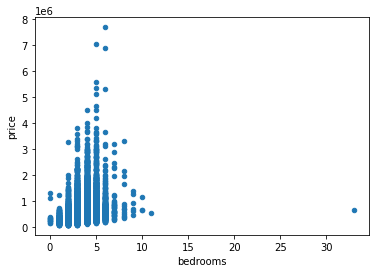

In [ ]:
df.plot.scatter('bedrooms', 'price')

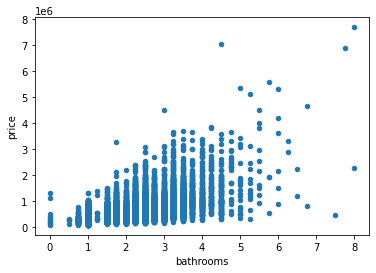

In [ ]:
df.plot.scatter('bathrooms', 'price')

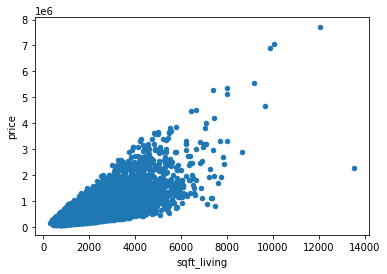

In [ ]:
df.plot.scatter('sqft_living', 'price')

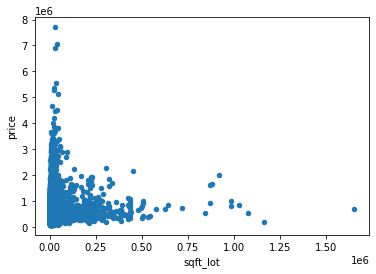

In [ ]:
df.plot.scatter('sqft_lot', 'price')

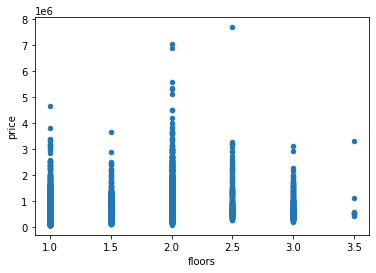

In [ ]:
df.plot.scatter('floors', 'price')

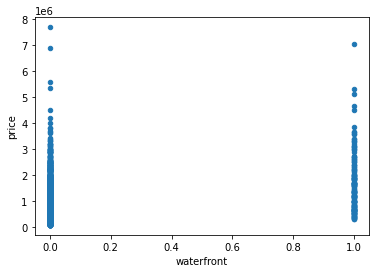

In [ ]:
df.plot.scatter('waterfront', 'price')

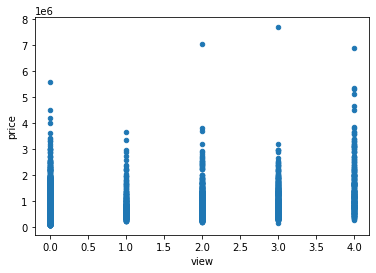

In [ ]:
df.plot.scatter('view', 'price')

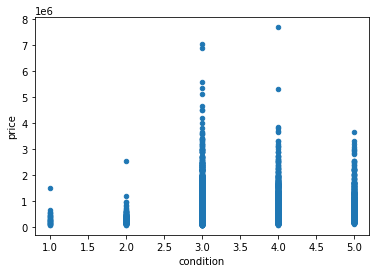

In [ ]:
df.plot.scatter('condition', 'price')

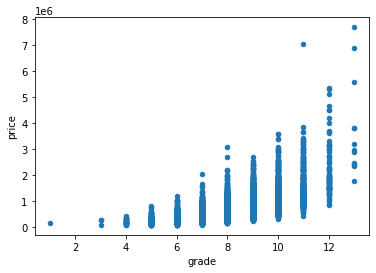

In [ ]:
df.plot.scatter('grade', 'price')

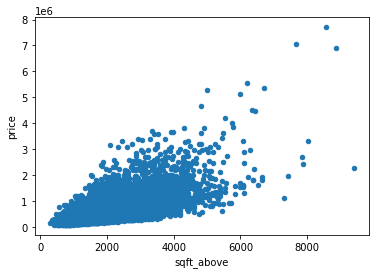

In [ ]:
df.plot.scatter('sqft_above', 'price')

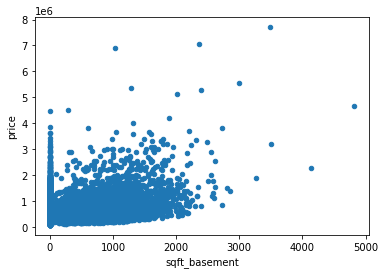

In [ ]:
df.plot.scatter('sqft_basement', 'price')

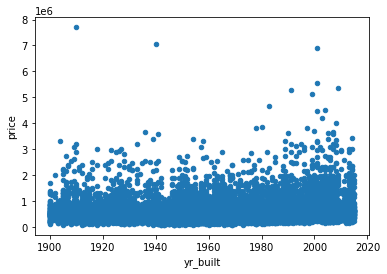

In [ ]:
df.plot.scatter('yr_built', 'price')

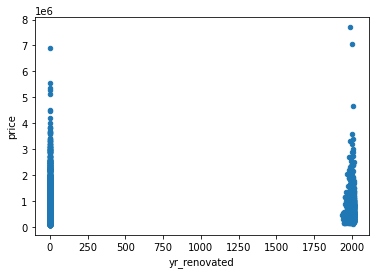

In [ ]:
df.plot.scatter('yr_renovated', 'price')

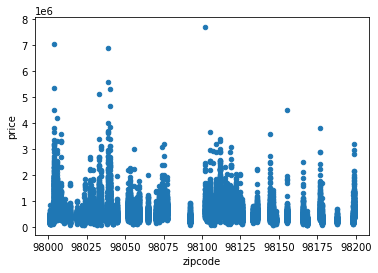

In [ ]:
df.plot.scatter('zipcode', 'price')

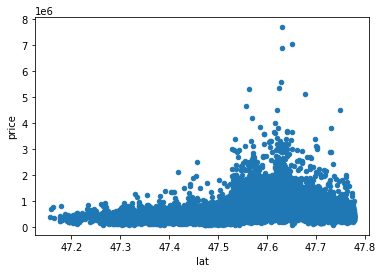

In [ ]:
df.plot.scatter('lat', 'price')

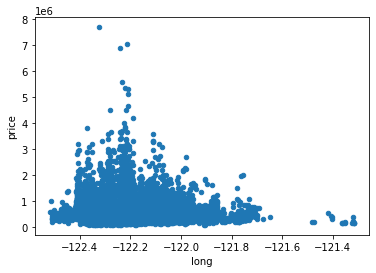

In [ ]:
df.plot.scatter('long', 'price')

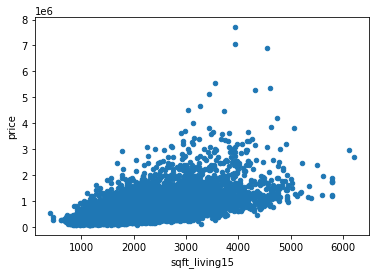

In [ ]:
df.plot.scatter('sqft_living15', 'price')

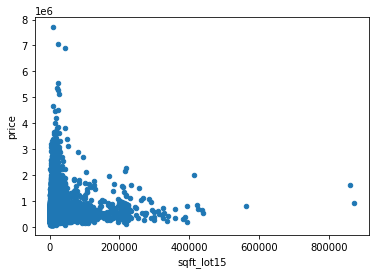

In [ ]:
df.plot.scatter('sqft_lot15', 'price')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


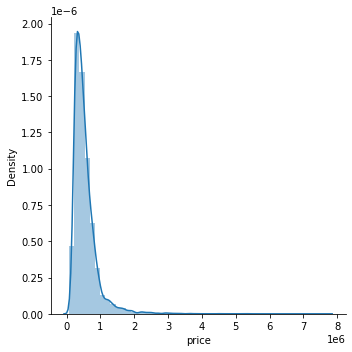

In [ ]:
sns.FacetGrid(df,size=5).map(sns.distplot,"price")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


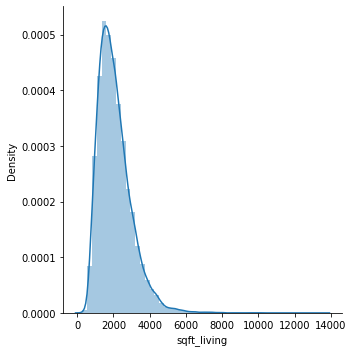

In [ ]:
sns.FacetGrid(df,size=5).map(sns.distplot,"sqft_living")

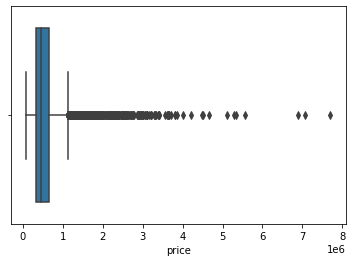

In [ ]:
sns.boxplot(x = "price",data = df)

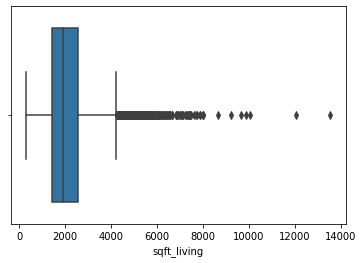

In [ ]:
sns.boxplot(x = "sqft_living", data = df)

# **CORRELATION**

In [ ]:
korelasi = df.corr(method='pearson')

In [ ]:
korelasi

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [ ]:
korelasi['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [ ]:
korelasi['price'].sort_values (ascending = False)         #Mengurutkan dengan nilai korelasi tertinggi terhadap variabel harga

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [ ]:
korelasi['grade']

id               0.008130
price            0.667434
bedrooms         0.356967
bathrooms        0.664983
sqft_living      0.762704
sqft_lot         0.113621
floors           0.458183
waterfront       0.082775
view             0.251321
condition       -0.144674
grade            1.000000
sqft_above       0.755923
sqft_basement    0.168392
yr_built         0.446963
yr_renovated     0.014414
zipcode         -0.184862
lat              0.114084
long             0.198372
sqft_living15    0.713202
sqft_lot15       0.119248
Name: grade, dtype: float64

In [ ]:
korelasi['grade'].sort_values (ascending = False)

grade            1.000000
sqft_living      0.762704
sqft_above       0.755923
sqft_living15    0.713202
price            0.667434
bathrooms        0.664983
floors           0.458183
yr_built         0.446963
bedrooms         0.356967
view             0.251321
long             0.198372
sqft_basement    0.168392
sqft_lot15       0.119248
lat              0.114084
sqft_lot         0.113621
waterfront       0.082775
yr_renovated     0.014414
id               0.008130
condition       -0.144674
zipcode         -0.184862
Name: grade, dtype: float64

In [ ]:
korelasi['sqft_living'].sort_values (ascending = False)

sqft_living      1.000000
sqft_above       0.876597
grade            0.762704
sqft_living15    0.756420
bathrooms        0.754665
price            0.702035
bedrooms         0.576671
sqft_basement    0.435043
floors           0.353949
yr_built         0.318049
view             0.284611
long             0.240223
sqft_lot15       0.183286
sqft_lot         0.172826
waterfront       0.103818
yr_renovated     0.055363
lat              0.052529
id              -0.012258
condition       -0.058753
zipcode         -0.199430
Name: sqft_living, dtype: float64

In [ ]:
korelasi['view'].sort_values (ascending = False)

view             1.000000
waterfront       0.401857
price            0.397293
sqft_living      0.284611
sqft_living15    0.280439
sqft_basement    0.276947
grade            0.251321
bathrooms        0.187737
sqft_above       0.167649
yr_renovated     0.103917
zipcode          0.084827
bedrooms         0.079532
sqft_lot         0.074710
sqft_lot15       0.072575
condition        0.045990
floors           0.029444
id               0.011592
lat              0.006157
yr_built        -0.053440
long            -0.078400
Name: view, dtype: float64

In [ ]:
korelasi['floors'].sort_values (ascending = False)

floors           1.000000
sqft_above       0.523885
bathrooms        0.500653
yr_built         0.489319
grade            0.458183
sqft_living      0.353949
sqft_living15    0.279885
price            0.256794
bedrooms         0.175429
long             0.125419
lat              0.049614
view             0.029444
waterfront       0.023698
id               0.018525
yr_renovated     0.006338
sqft_lot        -0.005201
sqft_lot15      -0.011269
zipcode         -0.059121
sqft_basement   -0.245705
condition       -0.263768
Name: floors, dtype: float64

In [ ]:
korelasi['long'].sort_values (ascending = False)

long             1.000000
yr_built         0.409356
sqft_above       0.343803
sqft_living15    0.334605
sqft_lot15       0.254451
sqft_living      0.240223
sqft_lot         0.229521
bathrooms        0.223042
grade            0.198372
bedrooms         0.129473
floors           0.125419
price            0.021626
id               0.020799
waterfront      -0.041910
yr_renovated    -0.068372
view            -0.078400
condition       -0.106500
lat             -0.135512
sqft_basement   -0.144765
zipcode         -0.564072
Name: long, dtype: float64

In [ ]:
korelasi['lat'].sort_values (ascending = False)

lat              1.000000
price            0.307003
zipcode          0.267048
grade            0.114084
sqft_basement    0.110538
sqft_living      0.052529
floors           0.049614
sqft_living15    0.048858
yr_renovated     0.029398
bathrooms        0.024573
view             0.006157
sqft_above      -0.000816
id              -0.001891
bedrooms        -0.008931
waterfront      -0.014274
condition       -0.014941
sqft_lot        -0.085683
sqft_lot15      -0.086419
long            -0.135512
yr_built        -0.148122
Name: lat, dtype: float64

In [ ]:
korelasi['zipcode'].sort_values (ascending = False)

zipcode          1.000000
lat              0.267048
view             0.084827
sqft_basement    0.074845
yr_renovated     0.064357
waterfront       0.030285
condition        0.003026
id              -0.008224
price           -0.053203
floors          -0.059121
sqft_lot        -0.129574
sqft_lot15      -0.147221
bedrooms        -0.152668
grade           -0.184862
sqft_living     -0.199430
bathrooms       -0.203866
sqft_above      -0.261190
sqft_living15   -0.279033
yr_built        -0.346869
long            -0.564072
Name: zipcode, dtype: float64